## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Resources](#Resources)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read data
df = pd.read_csv(r'C:\Users\Eng-mody\Desktop\Gitrepo\ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('Total number of rows in dataset are {}'.format(df.shape[0]))

Total number of rows in dataset are 294478


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### First glance:
after we look at ou data quickly using .info method i found that there is 5 columns 2 are int and 3 are objects data

c. The number of unique users in the dataset.

In [5]:
users_unique = df['user_id'].nunique()

print('The total number of unique users are {}'.format(users_unique))

The total number of unique users are 290584


d. The proportion of users converted.

In [6]:
# since user converted column contains only o and 1 so if we use .mean method 
#to find proportion or mean of conerted people it gives the same answer
converted = df.converted.mean()
print("The proportion of users converted is {}".format(round(converted,5)))

The proportion of users converted is 0.11966


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# get the number where landing_page equals new_page but group is not treatment
# get the number where landing_page not new_page but group is treatment

land1=(df.landing_page == 'new_page') & (df.group != 'treatment')
land2 = (df.landing_page != 'new_page') & (df.group == 'treatment')

x = df[land1 | land2].user_id.count()

print(" The Total number of times the new_page and treatment don't line up is {}".format(x))

 The Total number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [8]:
# Find rows with missing values with isnull
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There are no row or column with any missing values in our data**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# using the same logic from e.
df2 = df.drop(df[land1 | land2].index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# check for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
df2.user_id.nunique()

290584

**df.info()** shows 290585 entries but **df2.user_id.nunique()** gives 290584. Meaning there is one duplicate.

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# here we look for duplicated user_id, but we show both of those in our result by keep=False
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**It seems that all columns are the same but differ in timestamp column which means that this user is sampled twice**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates()

In [16]:
# another check for dublicated data
df2.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()


0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# first filter datafram where group equal control then calculate mean for converted column

df2.converted[df2.group == 'control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#  first filter datafram where group equal treatment then calculate mean for converted column
df2.converted[df2.group == 'treatment'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [20]:
round(df2.converted[df2.landing_page == 'new_page'].count()/df2.shape[0],4)

0.5001

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.


**1. The probability that an individual received the new page template is almost 0.5, so there is an equal chance that an individual received the old page at the same time.**

**2. In addition, the probability of conversion from control group and treatment group is almost similar.**

**3. Therfore we can't confidently say that one style of pages lead to more conversion.**



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis: ** The probability of old page better than new page is greater or equal to probability of new page. 

**Alternative Hypothesis: ** The probability of new page being better than new page is less than that of a new page.

$$ H_{0} : p_{old} - p_{new} \geq 0$$
$$ H_{A} : p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# convert rate
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# under the null hypothesis both are the same
p_old = df2.converted.mean() 
p_old

0.11959667567149027

c. What is $n_{new}$?

In [23]:
# number of users who got the new page (group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
print("The total number of user with old page is {}".format(n_new))

The total number of user with old page is 145311


d. What is $n_{old}$?

In [24]:
# number of users with old page (group = control)
n_old = df2[df2.group == 'control'].count()[0]
print("The total number of user with old page is {}".format(n_old))

The total number of user with old page is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

**NOTE: **
> - Below few cells will see alternative method, please run both of those in two different runs. They both give different results! <br>
> - As a matter of fact they **should not.** <br>
> - The difference will be visible in the histogram and in p-value

In [25]:
new_page_converted = np.random.binomial(1,p_new,n_new) 
new_page_converted.mean()

0.1205552229356346

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11994575767171001

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
print("The difference between p_new and p_old is {}".format(p_new - p_old))

The difference between p_new and p_old is 0.000609465263924594


In [28]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new) 
    old_page_converted = np.random.binomial(1,p_old,n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

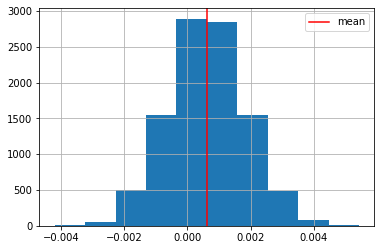

In [29]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

As expected the mean is very close to 0 and this mean there is no difference between both version of landing page and ratio of converted people. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
x= (actual_diff < p_diffs).mean()
print("The proportion of the p_diffs are greater than the actual difference observed in ab_data file is {}".format(x))

The proportion of the p_diffs are greater than the actual difference observed in ab_data file is 0.9634


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- **What we computed in part j. is called p-value in scientific studies.**
- **p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**
- **In our case the p-value is so big that we can confidently say that we fail to reject null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

From the link, we have all the values required. However, it is worth noticing that the argument alternative in the function is 'two-sided' by default. But our hypothesis is not designed around 'either-or' scenario at this point. Therefore, the argument alternative will be 'smaller', meaning one-tailed experiment. For further reading please refer to [wikipedia](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests)  article. As well as, a great informative [video](https://www.youtube.com/watch?v=fXOS4Q3nJQY) about z-scores.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3116075339133115, 0.905173705140591)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **A z-score represents how many standard deviations away our data point is from the mean and positive z-score means that our data points are above mean in the normal curve**
- **p-value of 0.9050 is very close to the p-value we computed earlier in part j.**
- **With this computation, we can confidently say we fail to reject null hypothesis due to very high p- value**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**This is a case of Logistic Regression. In this scenario, we want to predict something that has only two possible outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# copy the dataframe to a new one, for this step to avoid mess our original data
df2_copy = df2.copy()

In [34]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
logit_model = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page_treatment']])
answer = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        14:03:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.312      0.190      -0.037       0.007
=====================================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**In Part II, the p-value was calculated where the null hypothesis was that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page.**

**In Part III, we used variables, and used a linear model to determine the p-value. The null hypothesis was that the difference between the pages is equal to 0, and the alternative hypothesis was the difference between the pages is greater or less than 0.**

The null and alternative hypothesis associated with regression model will be as following:
$$ H_{0}: p_{old} - p_{new} = 0$$
$$ H_{0}: p_{old} - p_{new} \neq 0$$

In [37]:
# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
total_days = duration[-1] - duration[0]
days = total_days.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There can be many other factors that can be taken into consideration to add into our regression model.**

- **One of the first to consider would be the duration. The duration of this experiment was 21 days. Too short, it would be advisable to increase the duration**
- **Geographic location is another important factor.**
- **If the page is available in multiple languages,it can diversify the sample**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv(r'C:\Users\Eng-mody\Desktop\Gitrepo\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
# Create dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# fitting linear model
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','canada','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        14:03:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
canada        -0.0408      0.027     -1.518      0.129      -0.093       0.012
uk             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

<a id='conclusions'></a>

## Conclusions

I tried to understand whether the company should implement a new page or keep the old page with following approaches:
- Probability based approach
- A/B test
- Regression approach

**Probability based approach:**
- Given that an individual was in the treatment group, the probability they converted is 0.118807
- Given that an individual was in the control group, the probability they converted is 0.120386
- We find that old page does better, but by a very tiny margin.
- Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages.

**A/B test:**
  - We simulated our user groups with respect to conversions and the p_value to be 0.905 With such a p-value, we failed to     reject null hypothesis
  - Z-score of **1.3109** is less than the critical value of **1.6448**. So, we fail to reject null hypothesis.
  - The conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.
  - These values agree with the findings in parts j. and k. and from statastics point of view they are different but from           pracitcal point of view they are don't
  
**Regression Approach:**
  - We looked at exploring two possible outcomes. Whether new page is better or not.
  - With logistic regression results, we again encountered same z-score as well as p-value of 0.190
  - Adding geographic location of the users, we tried to find if any specific country had an impact on conversion the result       gave suggested that the countries have no impact on the conversion rate due to high p-value in second regression model.
  
**HINT:** 

In Part II, the p-value was calculated where the null hypothesis was that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page.

In Part III, we used variables, and used a linear model to determine the p-value. The null hypothesis was that the difference between the pages is equal to 0, and the alternative hypothesis was the difference between the pages is greater or less than 0.
 so this make difference in value of p-value but both tend to same conclusion there is no practical signficance between old and new page 
 
**Consideration:**
  - These inferences are strictly based on data on hand.
  - This analysis acknowledges its limitations due to factors not included in the data. 
  - We also looked at the duration of the experiment (21 days).This is a relatively short period of time to run the A/B test.

**References**

Udacity workspace and jupyter notebook template for AB testing
https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/f7f4edf8-b54d-488f-afb7-e8ec2a0819ca/lessons/7b40dff8-3bcd-4145-8dca-d706ae48bd56/concepts/15f9af80-9dde-4358-bbbb-3f7a5fc9659b